In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [10]:
N, D, H= 64, 1000, 100
x=tf.placeholder(tf.float32, shape=(N, D))
y=tf.placeholder(tf.float32, shape=(N, D))


In [27]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(H, input_shape=(D, ), activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(D))
y_pred=model(x)
loss=tf.losses.mean_squared_error(y_pred, y)
optimizer=tf.train.GradientDescentOptimizer(1e-2)
updates=optimizer.minimize(loss)

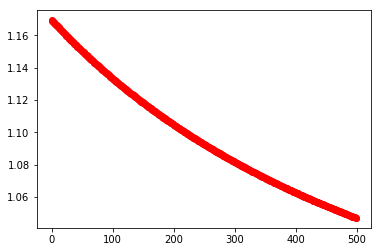

1.1693426 1.0470562


In [28]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values = {x: np.random.randn(N, D),
              y: np.random.randn(N, D),}
    steps=500
    loss_summary=[]
    for t in range(steps):
        loss_val,_=sess.run([loss , updates], feed_dict=values)
        loss_summary.append(loss_val)
    plt.plot(range(steps), loss_summary, 'ro',label='loss_value')
    plt.show()
    print(loss_summary[0],loss_summary[steps-1])